In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def F(w, X, y):
    return sum((w * x - y)**2 for x, y in zip(X, y))/len(y)


def dF(w, X, y):
    return sum(2*(w * x - y) * x for x, y in zip(X, y))/len(y)

In [3]:
def load_dataset(path):
#     cargamos dataset
    data = pd.read_csv(path)
    # dividimos en x,y
    x = data['size']
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle = True, random_state=0)
    return [X_train, X_test, y_train, y_test]

In [4]:
X_train, X_test, y_train, y_test = load_dataset('./dataset/dataset_ejercicio_I_regresion_lineal.csv')

In [5]:
def print_line(points, w, iteration, line_color = None, line_style = 'dotted'):
	list_x = []
	list_y = []
	for index, tuple in enumerate(points):
		x = tuple[0]
		y = x * w
		list_x.append(x)
		list_y.append(y)
	ax1.text(x,y, iteration, horizontalalignment='right')
	ax1.plot(list_x, list_y, color = line_color, linestyle= line_style)


iteration 0: w = 0.01162, F(w) = 13.97
iteration 1: w = 0.017241845384615387, F(w) = 3.952487831538461
iteration 2: w = 0.019961737426656807, F(w) = 1.6076899289522626
iteration 3: w = 0.02127764211884292, F(w) = 1.0588433579161511
iteration 4: w = 0.02191428693126635, F(w) = 0.9303749051740825
iteration 5: w = 0.022222300588784594, F(w) = 0.9003043094540717
iteration 6: w = 0.02237131996562775, F(w) = 0.893265688628056
iteration 7: w = 0.022443416686447365, F(w) = 0.8916181594738711
iteration 8: w = 0.022478297634570054, F(w) = 0.8912325225172876
iteration 9: w = 0.022495173305586796, F(w) = 0.8911422565199272
iteration 10: w = 0.022503337885037552, F(w) = 0.8911211279684739
iteration 11: w = 0.022507287971380283, F(w) = 0.8911161824109044
iteration 12: w = 0.022509199053538174, F(w) = 0.8911150248048222
iteration 13: w = 0.022510123649786797, F(w) = 0.8911147538441019
iteration 14: w = 0.02251057097656416, F(w) = 0.8911146904203578


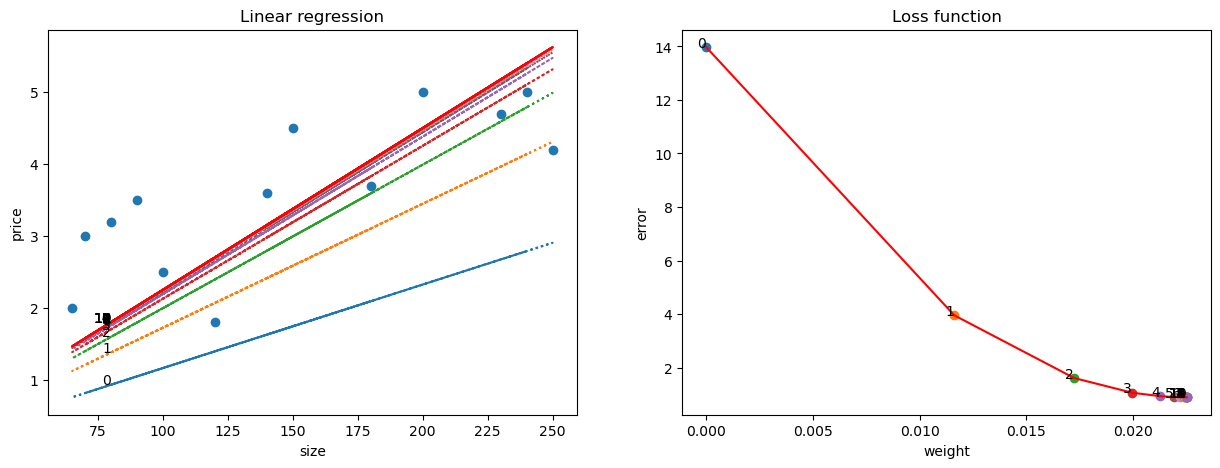

In [6]:
list_error = []
list_w = []	
iterations = 15

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Linear regression")
ax1.set(xlabel="size", ylabel="price")
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Loss function")
ax2.set(xlabel="weight", ylabel="error")

ax1.scatter(np.array(X_train), y_train)

w= 0
alpha = 0.00001

for t in range(iterations):
    error = F(w, np.array(X_train), y_train)
    gradient = dF(w, np.array(X_train), y_train)
    # print ('gradient = {}'.format(gradient))
    ax2.scatter(w, error)
    ax2.text(w, error, t, horizontalalignment='right')
    list_w.append(w)
    
    list_error.append(error)
    w = w - alpha * gradient
    
    print ('iteration {}: w = {}, F(w) = {}'.format(t, w, error))
    print_line(zip(np.array(X_train), y_train), w, t)

print_line(zip(np.array(X_train), y_train), w, t, 'red', 'solid')
ax2.plot(list_w, list_error, color = 'red', linestyle = 'solid')

plt.show()

In [7]:
from tabulate import tabulate
resultado = []
pred = {'X_test': X_test,
        'X_test * w' : X_test * max(list_w),
        'Valor real' : y_test}
print(tabulate(pred,headers=['X_test', 'Valor predicho manualmente', 'Valor real de y_test'],tablefmt="grid", numalign="center"))
# pred

+----------+------------------------------+------------------------+
|  X_test  |  Valor predicho manualmente  |  Valor real de y_test  |
+==========+==============================+========================+
|   150    |           3.37652            |          3.5           |
+----------+------------------------------+------------------------+
|   130    |           2.92632            |          2.8           |
+----------+------------------------------+------------------------+
